### Assignment 11 Text Mining 
Building a prediction model for Emotion Mining  for amazon review of Apple 11 prodect

In [1]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests

In [2]:
amazon='https://www.amazon.in/'
reviews='https://www.amazon.in/Apple-iPhone-11-Pro-512GB/product-reviews/B07XVMR9SP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [3]:
customer_name = []
review_title = []
rate = []
review_content = []

In [4]:
tt = 0
while tt == 0:
    page = requests.get(reviews)
    while page.ok == False:  
        page = requests.get(reviews)
    
    
    soup = bs(page.content,'html.parser')
    soup.prettify()
    
    names = soup.find_all('span', class_='a-profile-name')
    names.pop(0)
    names.pop(0)
    
    for i in range(0,len(names)):
        customer_name.append(names[i].get_text())
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        reviews = amazon + A
    except:
        break

In [5]:
print(soup.prettify())

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:feature:aui-assets -->
  <link href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41SIz69qHYL.css,21qPwhPKAAL.css,01Vctty9pOL.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,01ZfXnjPmmL.css,01oDR3IULNL.css,31ZcpBfSgNL.css,01XPHJk60-L.css,01R0k0yxPXL.css,21xVR0NtxzL.css,11gneA3MtJL.css,21fecG8pUzL.css,01RddH8vm-L.css,01CFUgsA-YL.css,21AmhU6t0s

### we'll check the length

In [6]:
len(customer_name)

347

### we'll check with review_title

In [8]:
len(review_title)

347

#### rate

In [10]:
len(rate)

347

### review_content

In [12]:
len(review_content)

347

In [13]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]

review_title[:] = [titles.rstrip('\n') for titles in review_title]

review_content[:] = [titles.lstrip('\n') for titles in review_content]

review_content[:] = [titles.rstrip('\n') for titles in review_content]

In [14]:
amaplus = pd.DataFrame()

In [15]:
amaplus['Customer Name'] = customer_name
amaplus['Review Title'] = review_title
amaplus['Rating'] = rate
amaplus['Reviews'] = review_content

In [16]:
amaplus.head()

,Customer Name,Review Title,Rating,Reviews
0,Soumyajit Dey,BEST PHONE in the SmartPhone Market..........H...,5.0 out of 5 stars,You Have to Love APPLE because they not only...
1,ASHISH THACKER,Nice and low price,5.0 out of 5 stars,You Have to Love APPLE because they not only...
2,Aaradhya.inc,Upto the Mark but not too much change & Batter...,3.0 out of 5 stars,I am always being fan of iOS & Apple Product...
3,Ekanta,Camera,4.0 out of 5 stars,I just got today. This looks really sexy. Aw...
4,Deepak,bad,1.0 out of 5 stars,box is open


In [17]:
amaplus.to_csv('amaplus.csv',index = True)

In [18]:
data = pd.read_csv("amaplus.csv",index_col=[0])

In [19]:
data.head()

,Customer Name,Review Title,Rating,Reviews
0,Soumyajit Dey,BEST PHONE in the SmartPhone Market..........H...,5.0 out of 5 stars,You Have to Love APPLE because they not only...
1,ASHISH THACKER,Nice and low price,5.0 out of 5 stars,You Have to Love APPLE because they not only...
2,Aaradhya.inc,Upto the Mark but not too much change & Batter...,3.0 out of 5 stars,I am always being fan of iOS & Apple Product...
3,Ekanta,Camera,4.0 out of 5 stars,I just got today. This looks really sexy. Aw...
4,Deepak,bad,1.0 out of 5 stars,box is open


In [20]:
data['text']=data['Review Title']+' '+data['Reviews']

In [21]:
data

,Customer Name,Review Title,Rating,Reviews,text
0,Soumyajit Dey,BEST PHONE in the SmartPhone Market..........H...,5.0 out of 5 stars,You Have to Love APPLE because they not only...,BEST PHONE in the SmartPhone Market..........H...
1,ASHISH THACKER,Nice and low price,5.0 out of 5 stars,You Have to Love APPLE because they not only...,Nice and low price You Have to Love APPLE be...
2,Aaradhya.inc,Upto the Mark but not too much change & Batter...,3.0 out of 5 stars,I am always being fan of iOS & Apple Product...,Upto the Mark but not too much change & Batter...
3,Ekanta,Camera,4.0 out of 5 stars,I just got today. This looks really sexy. Aw...,Camera I just got today. This looks really s...
4,Deepak,bad,1.0 out of 5 stars,box is open,bad box is open
...,...,...,...,...,...
342,Indrajit Guha,(༎ຶ‿༎ຶ),4.0 out of 5 stars,I agree the phone is great because of A13 bi...,(༎ຶ‿༎ຶ) I agree the phone is great because o...
343,Sonu Dua,Worth it for my brother's happiness,4.0 out of 5 stars,Bought it for my brother and he is very happ...,Worth it for my brother's happiness Bought i...
344,Jitendra Patel,Best as usual,5.0 out of 5 stars,Best,Best as usual Best
345,Bib,iPhone 11 pro,5.0 out of 5 stars,12 hour standby battery discharge is only 2%...,iPhone 11 pro 12 hour standby battery discha...


In [22]:
import re

In [23]:
re_without_space = re.compile("(\.)|(\,)|(\{)|(\})|(\()|(\))|(\[)|(\])|(\;)|(\:)|(\!)|(\`)|(\')|(\")|(\%)|(\$)|(\<)|(\>)|(\?)|(\|)|")
re_with_space = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")
def cleantext(var):
    var = re.sub('[0-9]', '', var)
    var = re.sub(r'https?:\/\/\S+', '', var)
    var = re.sub('_', '', var.lower())
    var = re_without_space.sub('', var)
    var = re_with_space.sub(' ', var)
    return var

In [24]:
data['clean1']=data['text'].apply(cleantext)

In [25]:
data.head()

,Customer Name,Review Title,Rating,Reviews,text,clean1
0,Soumyajit Dey,BEST PHONE in the SmartPhone Market..........H...,5.0 out of 5 stars,You Have to Love APPLE because they not only...,BEST PHONE in the SmartPhone Market..........H...,best phone in the smartphone markethandsdown ...
1,ASHISH THACKER,Nice and low price,5.0 out of 5 stars,You Have to Love APPLE because they not only...,Nice and low price You Have to Love APPLE be...,nice and low price you have to love apple be...
2,Aaradhya.inc,Upto the Mark but not too much change & Batter...,3.0 out of 5 stars,I am always being fan of iOS & Apple Product...,Upto the Mark but not too much change & Batter...,upto the mark but not too much change & batter...
3,Ekanta,Camera,4.0 out of 5 stars,I just got today. This looks really sexy. Aw...,Camera I just got today. This looks really s...,camera i just got today this looks really se...
4,Deepak,bad,1.0 out of 5 stars,box is open,bad box is open,bad box is open


In [26]:
!pip install text2emotion 


You should consider upgrading via the 'c:\users\lenovo\anaconda3\python.exe -m pip install --upgrade pip' command.



  Created wheel for emoji: filename=emoji-1.4.1-py3-none-any.whl size=186378 sha256=5f5b4295f33116cff0e6857fd144ab7d99bf6797e46b7337a0cfdbe0e543c960
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\9e\a5\d8\dea02b6be962ee32404006efa68513e8701aabc12fd80fd3f6
Successfully built emoji


In [27]:
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [28]:

def happy(var):
    e = te.get_emotion(var)
    return e.get('Happy')

def angry(var):
    e = te.get_emotion(var)
    return e.get('Angry')

def fear(var):
    e = te.get_emotion(var)
    return e.get('Fear')

def sad(var):
    e = te.get_emotion(var)
    return e.get('Sad')

def surprise(var):
    e = te.get_emotion(var)
    return e.get('Surprise')


In [29]:
data['Happy']=data['clean1'].apply(happy)

In [30]:
data['Angry']=data['clean1'].apply(angry)
data['Fear']=data['clean1'].apply(fear)
data['Sad']=data['clean1'].apply(sad)
data['Surprise']=data['clean1'].apply(surprise)

In [31]:
data.head()

,Customer Name,Review Title,Rating,Reviews,text,clean1,Happy,Angry,Fear,Sad,Surprise
0,Soumyajit Dey,BEST PHONE in the SmartPhone Market..........H...,5.0 out of 5 stars,You Have to Love APPLE because they not only...,BEST PHONE in the SmartPhone Market..........H...,best phone in the smartphone markethandsdown ...,0.12,0.08,0.24,0.24,0.32
1,ASHISH THACKER,Nice and low price,5.0 out of 5 stars,You Have to Love APPLE because they not only...,Nice and low price You Have to Love APPLE be...,nice and low price you have to love apple be...,0.15,0.08,0.23,0.27,0.27
2,Aaradhya.inc,Upto the Mark but not too much change & Batter...,3.0 out of 5 stars,I am always being fan of iOS & Apple Product...,Upto the Mark but not too much change & Batter...,upto the mark but not too much change & batter...,0.14,0.00,0.21,0.29,0.36
3,Ekanta,Camera,4.0 out of 5 stars,I just got today. This looks really sexy. Aw...,Camera I just got today. This looks really s...,camera i just got today this looks really se...,0.00,0.00,0.00,0.00,1.00
4,Deepak,bad,1.0 out of 5 stars,box is open,bad box is open,bad box is open,0.00,0.00,0.50,0.50,0.00


In [32]:
import matplotlib.pyplot as plt

In [33]:
happy_score=data['Happy'].sum()
angry_score=data['Angry'].sum()
fear_score=data['Fear'].sum()
sad_score=data['Sad'].sum()
surprise_score=data['Surprise'].sum()

In [34]:
mylabels=['happy','angry','fear','sad','surprise']

In [37]:
total

[128.05, 4.359999999999999, 62.68, 39.75, 82.96]

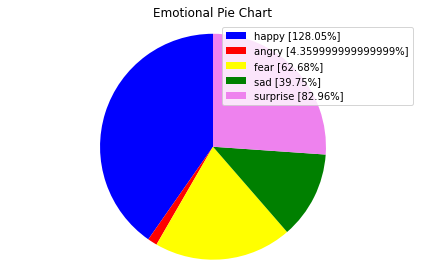

In [36]:
labels = ['happy ['+str(happy_score)+'%]', 'angry ['+str(angry_score)+'%]', 
'fear ['+str(fear_score)+'%]','sad ['+str(sad_score)+'%]','surprise ['+str(surprise_score)+'%]']

total=[happy_score,angry_score,fear_score,sad_score,surprise_score]

colors = ['blue','red','yellow','green','violet']
patches, texts = plt.pie(total, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("Emotional Pie Chart")
plt.axis('equal')
plt.tight_layout()




### With the help of above pie digram , we can clearly see majority of the customers are either happy or surprise

#### So, we can conclude THE IPHONE 11 PRO is a good product